<a href="https://colab.research.google.com/github/logikon-ai/cot-eval/blob/main/notebooks/CoT_Leaderboard_Minimal_Model_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimal Model Dashboard -- Exploring the `AI2`&`/\/` Open CoT Leaderboard Results

### Init

In [ ]:
%pip install -Uq datasets huggingface_hub seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.5/388.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
EVAL_DATASET = "cot-leaderboard/cot-eval-results"
LOCAL_DIR = "cot-eval-results"
SUBSETS = ["base","cot","orig"]

In [ ]:
import getpass
from huggingface_hub import HfApi, login

HF_TOKEN = getpass.getpass("HF Token:")
API = HfApi(token=HF_TOKEN)
login(HF_TOKEN, add_to_git_credential=True)

HF Token:··········
Token is valid (permission: read).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


### Load evaluation results

In [ ]:
from huggingface_hub import snapshot_download

snapshot_download(
    repo_id=EVAL_DATASET,
    revision="main",
    local_dir=LOCAL_DIR,
    repo_type="dataset",
    max_workers=60,
    token=HF_TOKEN
)


(…)i/Yi-34B/cot/24-04-09-06:41:30_idx0.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)/Yi-34B/cot/24-04-09-06:41:30_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)/Yi-34B/cot/24-04-09-06:41:30_idx20.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-34B/orig/results_24-04-09-06:41:30.json:   0%|          | 0.00/8.76k [00:00<?, ?B/s]

(…)/01-ai/Yi-6B/base/24-02-03-02:34:08.json:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

(…)i-6B/orig/results_24-02-03-02:34:08.json:   0%|          | 0.00/8.76k [00:00<?, ?B/s]

(…)01-ai/Yi-34B/base/24-04-09-06:41:30.json:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/2.31k [00:00<?, ?B/s]

(…)i/Yi-34B/cot/24-04-09-06:41:30_idx5.json:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

(…)-7B-instruct/base/24-01-30-16:45:50.json:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

(…)/Yi-34B/cot/24-04-09-06:41:30_idx15.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)/Yi-34B/cot/24-04-09-06:41:30_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)a/01-ai/Yi-6B/cot/24-02-03-02:34:08.json:   0%|          | 0.00/62.1k [00:00<?, ?B/s]

(…)v3-1/orig/results_24-01-30-05:18:55.json:   0%|          | 0.00/5.14k [00:00<?, ?B/s]

(…)ci/DeciLM-7B/base/24-02-03-00:47:02.json:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

(…)ruct/orig/results_24-01-30-16:45:50.json:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

(…)-v0.2-7B/cot/24-04-08-10:47:24_idx0.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-7b-beta/cot/24-03-17-13:58:51_idx0.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)M-7B/orig/results_24-02-03-00:47:02.json:   0%|          | 0.00/8.76k [00:00<?, ?B/s]

(…)M-7B-instruct/cot/24-01-30-16:45:50.json:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

(…)v0.2-7B/cot/24-04-08-10:47:24_idx15.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)phyr-7b-beta/base/24-03-17-13:58:51.json:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

(…)7b-beta/cot/24-03-17-13:58:51_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)m-1.0-7b-DPO/base/24-04-08-13:32:26.json:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

(…)-DPO/orig/results_24-04-08-13:32:26.json:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

(…)-7b-DPO/cot/24-04-08-13:32:26_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)eci/DeciLM-7B/cot/24-02-03-00:47:02.json:   0%|          | 0.00/61.6k [00:00<?, ?B/s]

(…)tral-7B/cot/24-04-14-21:18:17_idx10.json:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

(…)-7b-DPO/cot/24-04-08-13:32:26_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)-7b-beta/cot/24-03-17-13:58:51_idx5.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)0-7b-DPO/cot/24-04-08-13:32:26_idx0.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)0-7b-DPO/cot/24-04-08-13:32:26_idx5.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)o-Mistral-7B/base/24-04-14-21:18:17.json:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

(…)7b-beta/cot/24-03-17-13:58:51_idx15.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)stral-7B/cot/24-04-14-21:18:17_idx0.json:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

(…)v0.2-7B/cot/24-04-08-10:47:24_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)7b-beta/cot/24-03-17-13:58:51_idx20.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)l-7B/orig/results_24-04-14-21:18:17.json:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

(…)7b-beta/cot/24-03-17-13:58:51_idx25.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)ma-2-7b/cot/24-03-22-00:25:09_idx10.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)beta/orig/results_24-03-17-13:58:51.json:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

(…)chat-7b-v3-1/base/24-01-30-05:18:55.json:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

(…)-7b-DPO/cot/24-04-08-13:32:26_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)-chat-7b-v3-1/cot/24-01-30-05:18:55.json:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

(…)v0.2-7B/cot/24-04-08-10:47:24_idx20.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)2-7b/orig/results_24-03-22-00:25:09.json:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

(…)v0.2-7B/cot/24-04-08-10:47:24_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)i/tulu-2-13b/base/24-03-25-20:29:42.json:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

(…)tral-v0.2-7B/base/24-04-08-10:47:24.json:   0%|          | 0.00/9.96k [00:00<?, ?B/s]

(…)-v0.2-7B/cot/24-04-08-10:47:24_idx5.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)0.2-32k/cot/24-04-08-13:02:28_idx25.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)u-2-13b/cot/24-03-25-20:29:42_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)u-2-13b/cot/24-03-25-20:29:42_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)u-2-13b/cot/24-03-25-20:29:42_idx15.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)lu-2-13b/cot/24-03-25-20:29:42_idx5.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)lu-2-13b/cot/24-03-25-20:29:42_idx0.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)-32k/orig/results_24-04-08-13:02:28.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)s-llama-2-7b/base/24-03-22-00:25:09.json:   0%|          | 0.00/9.78k [00:00<?, ?B/s]

Fetching 287 files:   0%|          | 0/287 [00:00<?, ?it/s]

(…)tral-7B/cot/24-04-14-21:18:17_idx15.json:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

(…)ama-2-7b/cot/24-03-22-00:25:09_idx0.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)-7b-DPO/cot/24-04-08-13:32:26_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)2-7B/orig/results_24-04-08-10:47:24.json:   0%|          | 0.00/8.79k [00:00<?, ?B/s]

(…)ma-2-7b/cot/24-03-22-00:25:09_idx20.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)tral-7B/cot/24-04-14-21:18:17_idx20.json:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…)20.2-32k/cot/24-04-08-13:02:28_idx0.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)lu-2-70b/cot/24-03-22-12:07:07_idx5.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)tral-7B/cot/24-04-14-21:18:17_idx25.json:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…)ma-2-7b/cot/24-03-22-00:25:09_idx25.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)lu-2-70b/cot/24-03-22-12:07:07_idx0.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)0.2-32k/cot/24-04-08-13:02:28_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ma-2-7b/cot/24-03-22-00:25:09_idx15.json:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

(…)7b-v20.2-32k/base/24-04-08-13:02:28.json:   0%|          | 0.00/9.93k [00:00<?, ?B/s]

(…)ama-2-7b/cot/24-03-22-00:25:09_idx5.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)stral-7B/cot/24-04-14-21:18:17_idx5.json:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

(…)ai/tulu-2-7b/base/24-01-31-11:05:58.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

(…)dpo-13b/cot/24-03-26-02:37:51_idx20.json:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

(…)0.2-32k/cot/24-04-08-13:02:28_idx15.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)20.2-32k/cot/24-04-08-13:02:28_idx5.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)dpo-13b/cot/24-03-26-02:37:51_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)lu-2-dpo-13b/base/24-03-26-02:37:51.json:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

(…)nai/tulu-2-7b/cot/24-01-31-11:05:58.json:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

(…)-dpo-13b/cot/24-03-26-02:37:51_idx0.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)-dpo-13b/cot/24-03-26-02:37:51_idx5.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)dpo-13b/cot/24-03-26-02:37:51_idx15.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)2-7b/orig/results_24-01-31-11:05:58.json:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

(…)-13b/orig/results_24-03-26-02:37:51.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)dpo-13b/cot/24-03-26-02:37:51_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)u-2-13b/cot/24-03-25-20:29:42_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)0.2-32k/cot/24-04-08-13:02:28_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)lu-2-dpo-70b/base/24-03-24-00:11:42.json:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

(…)i/tulu-2-70b/base/24-03-22-12:07:07.json:   0%|          | 0.00/9.87k [00:00<?, ?B/s]

(…)-dpo-70b/cot/24-03-24-00:11:42_idx0.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)-70b/orig/results_24-03-22-12:07:07.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)-13b/orig/results_24-03-25-20:29:42.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)dpo-70b/cot/24-03-24-00:11:42_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)u-2-70b/cot/24-03-22-12:07:07_idx20.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)u-2-70b/cot/24-03-22-12:07:07_idx15.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)dpo-70b/cot/24-03-24-00:11:42_idx15.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)u-2-70b/cot/24-03-22-12:07:07_idx25.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)dpo-70b/cot/24-03-24-00:11:42_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)u-2-70b/cot/24-03-22-12:07:07_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)dpo-70b/cot/24-03-24-00:11:42_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)ulu-2-dpo-7b/base/24-03-26-10:11:02.json:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

(…)-dpo-7b/cot/24-03-26-10:11:02_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-70b/orig/results_24-03-24-00:11:42.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)-dpo-70b/cot/24-03-24-00:11:42_idx5.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)2-dpo-7b/cot/24-03-26-10:11:02_idx0.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)osyne-7B/cot/24-04-20-03:17:23_idx0.json:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…)-dpo-7b/cot/24-03-26-10:11:02_idx20.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)2-dpo-7b/cot/24-03-26-10:11:02_idx5.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)ly-v2-3b/cot/24-03-20-10:28:44_idx5.json:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

(…)Mnemosyne-7B/base/24-04-20-03:17:23.json:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

(…)syne-7B/cot/24-04-20-03:17:23_idx10.json:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…)-dpo-7b/cot/24-03-26-10:11:02_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)e-7B/orig/results_24-04-20-03:17:23.json:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

(…)-dpo-7b/cot/24-03-26-10:11:02_idx15.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)osyne-7B/cot/24-04-20-03:17:23_idx5.json:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

(…)o-7b/orig/results_24-03-26-10:11:02.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)/dolly-v2-3b/base/24-03-20-10:28:44.json:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

(…)syne-7B/cot/24-04-20-03:17:23_idx20.json:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…)ly-v2-3b/cot/24-03-20-10:28:44_idx0.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)syne-7B/cot/24-04-20-03:17:23_idx15.json:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…)y-v2-3b/cot/24-03-20-10:28:44_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)a-2b-it/cot/24-03-17-10:11:14_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)y-v2-3b/cot/24-03-20-10:28:44_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)2-3b/orig/results_24-03-20-10:28:44.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)/gemma-2b-it/base/24-03-17-10:11:14.json:   0%|          | 0.00/9.97k [00:00<?, ?B/s]

(…)y-v2-3b/cot/24-03-20-10:28:44_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)a-2b-it/cot/24-03-17-10:11:14_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)syne-7B/cot/24-04-20-03:17:23_idx25.json:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

(…)b-it/orig/results_24-03-17-10:11:14.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)a-2b-it/cot/24-03-17-10:11:14_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ma-2b-it/cot/24-03-17-10:11:14_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)a-2b-it/cot/24-03-17-10:11:14_idx20.json:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

(…)y-v2-3b/cot/24-03-20-10:28:44_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ma-2b-it/cot/24-03-17-10:11:14_idx0.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ma-7b-it/cot/24-04-09-07:34:14_idx0.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)/gemma-7b-it/base/24-04-09-07:34:14.json:   0%|          | 0.00/9.87k [00:00<?, ?B/s]

(…)a-7b-it/cot/24-04-09-07:34:14_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)a-7b-it/cot/24-04-09-07:34:14_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)a-7b-it/cot/24-04-09-07:34:14_idx25.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)a-7b-it/cot/24-04-09-07:34:14_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)emma-2b/cot/24-03-17-01:14:20_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)emma-2b/cot/24-03-17-01:14:20_idx15.json:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

(…)gle/gemma-2b/base/24-03-17-01:14:20.json:   0%|          | 0.00/9.90k [00:00<?, ?B/s]

(…)gemma-2b/cot/24-03-17-01:14:20_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)ish-2-7b-32k/base/24-04-08-16:28:14.json:   0%|          | 0.00/9.94k [00:00<?, ?B/s]

(…)a-2b/orig/results_24-03-17-01:14:20.json:   0%|          | 0.00/8.76k [00:00<?, ?B/s]

(…)-7b-32k/cot/24-04-08-16:28:14_idx10.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)2-7b-32k/cot/24-04-08-16:28:14_idx0.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)b-it/orig/results_24-04-09-07:34:14.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)emma-2b/cot/24-03-17-01:14:20_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)gemma-2b/cot/24-03-17-01:14:20_idx0.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)emma-2b/cot/24-03-17-01:14:20_idx10.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)ma-7b-it/cot/24-04-09-07:34:14_idx5.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-7b-32k/cot/24-04-08-16:28:14_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)-7b-32k/cot/24-04-08-16:28:14_idx15.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)-7b-32k/cot/24-04-08-16:28:14_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-32k/orig/results_24-04-08-16:28:14.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)-chat-hf/cot/24-03-25-11:24:10_idx0.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-13b-chat-hf/base/24-03-25-11:24:10.json:   0%|          | 0.00/9.94k [00:00<?, ?B/s]

(…)2-7b-32k/cot/24-04-08-16:28:14_idx5.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)chat-hf/cot/24-03-25-11:24:10_idx20.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-chat-hf/cot/24-03-25-11:24:10_idx5.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)t-hf/orig/results_24-03-25-11:24:10.json:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

(…)ama-2-13b-hf/base/24-03-25-06:04:55.json:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

(…)-13b-hf/cot/24-03-25-06:04:55_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)chat-hf/cot/24-03-25-11:24:10_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-13b-hf/cot/24-03-25-06:04:55_idx25.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)-13b-hf/cot/24-03-25-06:04:55_idx10.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)chat-hf/cot/24-03-25-11:24:10_idx15.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)2-13b-hf/cot/24-03-25-06:04:55_idx0.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)chat-hf/cot/24-03-25-11:24:10_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-13b-hf/cot/24-03-25-06:04:55_idx20.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)2-13b-hf/cot/24-03-25-06:04:55_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)-70b-chat-hf/base/24-03-24-21:15:56.json:   0%|          | 0.00/9.81k [00:00<?, ?B/s]

(…)chat-hf/cot/24-03-24-21:15:56_idx15.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)b-hf/orig/results_24-03-25-06:04:55.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)chat-hf/cot/24-03-24-21:15:56_idx20.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)-chat-hf/cot/24-03-24-21:15:56_idx0.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)-chat-hf/cot/24-03-24-21:15:56_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)-70b-hf/cot/24-03-23-13:48:02_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ama-2-70b-hf/base/24-03-23-13:48:02.json:   0%|          | 0.00/9.74k [00:00<?, ?B/s]

(…)b-hf/orig/results_24-03-23-13:48:02.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)t/Orca-2-13b/base/24-04-08-20:20:22.json:   0%|          | 0.00/9.97k [00:00<?, ?B/s]

(…)2-70b-hf/cot/24-03-23-13:48:02_idx0.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)2-70b-hf/cot/24-03-23-13:48:02_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)chat-hf/cot/24-03-24-21:15:56_idx25.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)-70b-hf/cot/24-03-23-13:48:02_idx10.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)t-hf/orig/results_24-03-24-21:15:56.json:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

(…)-70b-hf/cot/24-03-23-13:48:02_idx25.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)chat-hf/cot/24-03-24-21:15:56_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ca-2-13b/cot/24-04-08-20:20:22_idx0.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ca-2-13b/cot/24-04-08-20:20:22_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)Llama-2-7b-hf/cot/24-01-30-09:55:14.json:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

(…)a-2-13b/cot/24-04-08-20:20:22_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)a-2-13b/cot/24-04-08-20:20:22_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)b-hf/orig/results_24-01-30-09:55:14.json:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

(…)-70b-hf/cot/24-03-23-13:48:02_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)lama-2-7b-hf/base/24-01-30-09:55:14.json:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

(…)ft/Orca-2-7b/base/24-04-08-20:48:48.json:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

(…)-13b/orig/results_24-04-08-20:20:22.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)rca-2-7b/cot/24-04-08-20:48:48_idx0.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)a-2-13b/cot/24-04-08-20:20:22_idx15.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)ca-2-7b/cot/24-04-08-20:48:48_idx20.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)rca-2-7b/cot/24-04-08-20:48:48_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)ca-2-7b/cot/24-04-08-20:48:48_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ca-2-7b/cot/24-04-08-20:48:48_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)a-2-13b/cot/24-04-08-20:20:22_idx20.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ca-2-7b/cot/24-04-08-20:48:48_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)rosoft/phi-2/base/24-02-05-18:00:45.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

(…)Instruct-v0.2/cot/24-01-29-13:12:03.json:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

(…)2-7b/orig/results_24-04-08-20:48:48.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)tral-7B-v0.1/base/24-02-02-23:43:14.json:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

(…)hi-2/orig/results_24-02-05-18:00:45.json:   0%|          | 0.00/8.76k [00:00<?, ?B/s]

(…)nstruct-v0.2/base/24-01-29-13:12:03.json:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

(…)crosoft/phi-2/cot/24-02-05-18:00:45.json:   0%|          | 0.00/62.1k [00:00<?, ?B/s]

(…)v0.2/orig/results_24-01-29-13:12:03.json:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

(…)ct-v0.1/cot/24-04-09-09:24:28_idx10.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)stral-7B-v0.1/cot/24-02-02-23:43:14.json:   0%|          | 0.00/61.9k [00:00<?, ?B/s]

(…)v0.1/orig/results_24-02-02-23:43:14.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)nstruct-v0.1/base/24-04-09-09:24:28.json:   0%|          | 0.00/9.78k [00:00<?, ?B/s]

(…)uct-v0.1/cot/24-04-09-09:24:28_idx0.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)al-8x7B-v0.1/base/24-04-09-07:02:26.json:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

(…)7B-v0.1/cot/24-04-09-07:02:26_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)uct-v0.1/cot/24-04-09-09:24:28_idx5.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)x7B-v0.1/cot/24-04-09-07:02:26_idx0.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)7B-v0.1/cot/24-04-09-07:02:26_idx15.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)ct-v0.1/cot/24-04-09-09:24:28_idx15.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)v0.1/orig/results_24-04-09-09:24:28.json:   0%|          | 0.00/8.79k [00:00<?, ?B/s]

(…)arch-7B/cot/24-04-20-13:57:04_idx10.json:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…)x7B-v0.1/cot/24-04-09-07:02:26_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)arch-7B/cot/24-04-20-13:57:04_idx15.json:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…)haMonarch-7B/base/24-04-20-13:57:04.json:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

(…)7B-v0.1/cot/24-04-09-07:02:26_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)v0.1/orig/results_24-04-09-07:02:26.json:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

(…)narch-7B/cot/24-04-20-13:57:04_idx0.json:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…)ct-v0.1/cot/24-04-09-09:24:28_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)7B-v0.1/cot/24-04-09-07:02:26_idx10.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)ct-v0.1/cot/24-04-09-09:24:28_idx20.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)arch-7B/cot/24-04-20-13:57:04_idx20.json:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…)h-7B/orig/results_24-04-20-13:57:04.json:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

(…)-7b-kto/cot/24-04-09-19:51:31_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)hat-3.5-0106/base/24-02-07-18:33:32.json:   0%|          | 0.00/56.3k [00:00<?, ?B/s]

(…)-70b-sft/cot/24-04-09-20:47:23_idx5.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)-7b-kto/cot/24-04-09-19:51:31_idx20.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)urus-70b-sft/base/24-04-09-20:47:23.json:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

(…)70b-sft/cot/24-04-09-20:47:23_idx25.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)70b-sft/cot/24-04-09-20:47:23_idx10.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)70b-sft/cot/24-04-09-20:47:23_idx20.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)-70b-sft/cot/24-04-09-20:47:23_idx0.json:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

(…)-7b-kto/cot/24-04-09-19:51:31_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)-7b-kto/cot/24-04-09-19:51:31_idx25.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)70b-sft/cot/24-04-09-20:47:23_idx15.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)arch-7B/cot/24-04-20-13:57:04_idx25.json:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…)narch-7B/cot/24-04-20-13:57:04_idx5.json:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

(…)-kto/orig/results_24-04-09-19:51:31.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)5-Mistral-7B/base/24-03-21-08:01:22.json:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

(…)s-7b-kto/cot/24-04-09-19:51:31_idx5.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)s-7b-kto/cot/24-04-09-19:51:31_idx0.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)-sft/orig/results_24-04-09-20:47:23.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)0106/orig/results_24-02-07-18:33:32.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)chat-3.5-0106/cot/24-02-07-18:33:32.json:   0%|          | 0.00/61.9k [00:00<?, ?B/s]

(…)Eurus-7b-kto/base/24-04-09-19:51:31.json:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

(…)stral-7B/cot/24-03-21-08:01:22_idx5.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)stral-7B/cot/24-03-21-08:01:22_idx0.json:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)tral-7B/cot/24-03-21-08:01:22_idx25.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)tral-7B/cot/24-03-21-08:01:22_idx10.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)tral-7B/cot/24-03-21-08:01:22_idx20.json:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

(…)nstruct-v1.0/base/24-04-09-09:48:11.json:   0%|          | 0.00/9.92k [00:00<?, ?B/s]

(…)l-7B/orig/results_24-03-21-08:01:22.json:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

(…)ct-v1.0/cot/24-04-09-09:48:11_idx10.json:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

(…)tral-7B/cot/24-03-21-08:01:22_idx15.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)uct-v1.0/cot/24-04-09-09:48:11_idx0.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…)ct-v1.0/cot/24-04-09-09:48:11_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)uct-v1.0/cot/24-04-09-09:48:11_idx5.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)ct-v1.0/cot/24-04-09-09:48:11_idx15.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)ct-v1.0/cot/24-04-09-09:48:11_idx20.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)v1.0/orig/results_24-04-09-09:48:11.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)R-10.7B-v1.0/base/24-04-09-09:15:40.json:   0%|          | 0.00/9.87k [00:00<?, ?B/s]

(…)7B-v1.0/cot/24-04-09-09:15:40_idx10.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)7B-v1.0/cot/24-04-09-09:15:40_idx15.json:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…).7B-v1.0/cot/24-04-09-09:15:40_idx0.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)v1.0/orig/results_24-04-09-09:15:40.json:   0%|          | 0.00/8.77k [00:00<?, ?B/s]

(…)7B-v1.0/cot/24-04-09-09:15:40_idx20.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

(…).7B-v1.0/cot/24-04-09-09:15:40_idx5.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…)7B-v1.0/cot/24-04-09-09:15:40_idx25.json:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

'/content/cot-eval-results'

In [ ]:
# get all models for which results are stored
import glob

models = []
for path in glob.glob(f"{LOCAL_DIR}/data/*/*", recursive=False):
  models.append(path.replace(f"{LOCAL_DIR}/data/",""))
models

['01-ai/Yi-6B',
 '01-ai/Yi-34B',
 'Deci/DeciLM-7B',
 'Deci/DeciLM-7B-instruct',
 'google/gemma-2b',
 'google/gemma-2b-it',
 'google/gemma-7b-it',
 'databricks/dolly-v2-3b',
 'mistralai/Mixtral-8x7B-Instruct-v0.1',
 'mistralai/Mistral-7B-Instruct-v0.2',
 'mistralai/Mistral-7B-v0.1',
 'mistralai/Mixtral-8x7B-v0.1',
 'OpenBuddy/openbuddy-mistral2-7b-v20.2-32k',
 'meta-llama/Llama-2-13b-hf',
 'meta-llama/Llama-2-70b-chat-hf',
 'meta-llama/Llama-2-13b-chat-hf',
 'meta-llama/Llama-2-70b-hf',
 'meta-llama/Llama-2-7b-hf',
 'allenai/tulu-2-7b',
 'allenai/tulu-2-70b',
 'allenai/tulu-2-dpo-13b',
 'allenai/tulu-2-13b',
 'allenai/tulu-2-dpo-70b',
 'allenai/tulu-2-dpo-7b',
 'ichigoberry/pandafish-2-7b-32k',
 'openbmb/Eurus-70b-sft',
 'openbmb/Eurus-7b-kto',
 'microsoft/Orca-2-7b',
 'microsoft/Orca-2-13b',
 'microsoft/phi-2',
 'bunnycore/Mnemosyne-7B',
 'mlabonne/AlphaMonarch-7B',
 'Locutusque/Hercules-4.0-Mistral-v0.2-7B',
 'Locutusque/OpenCerebrum-1.0-7b-DPO',
 'upstage/SOLAR-10.7B-v1.0',
 'upstage

### Cast and postprocess evaluation results

In [ ]:
import json

import pandas as pd

results = []

for model in models:
    for subset in SUBSETS:
        result_files = glob.glob(f"{LOCAL_DIR}/data/{model}/{subset}/**/*.json", recursive=True)
        for json_filepath in result_files:
            with open(json_filepath) as fp:
                data = json.load(fp)
            if "results" in data.keys():
                for k,v in data["results"].items():
                    record = v.copy()
                    record["model"] = model
                    record["subset"] = subset
                    results.append(record)

df_results = pd.DataFrame(results)
del results

In [ ]:
def split_alias(alias: str) -> pd.Series:
    if alias[-5:]=="_base":
        alias = alias[:-5]
    elif alias[-4:]=="_cot":
        alias = alias[:-4]

    if "_" not in alias:
        task = alias
        config = ""
    else:
        config, task = alias.split("_")

    return pd.Series({"task": task, "config": config})

df_results = pd.concat([df_results, df_results.alias.apply(split_alias)], axis=1)

In [ ]:
df_results.head()

,"acc,none","acc_stderr,none",alias,model,subset,task,config
0,0.260223,0.026801,omnis-voluptatibus_lsat-rc_base,01-ai/Yi-6B,base,lsat-rc,omnis-voluptatibus
1,0.225490,0.018523,omnis-voluptatibus_lsat-lr_base,01-ai/Yi-6B,base,lsat-lr,omnis-voluptatibus
2,0.200000,0.026433,omnis-voluptatibus_lsat-ar_base,01-ai/Yi-6B,base,lsat-ar,omnis-voluptatibus
3,0.273163,0.017823,omnis-voluptatibus_logiqa_base,01-ai/Yi-6B,base,logiqa,omnis-voluptatibus
4,0.299618,0.011557,omnis-voluptatibus_logiqa2_base,01-ai/Yi-6B,base,logiqa2,omnis-voluptatibus


In [ ]:
df_baseline = df_results[df_results.subset.eq("base")].groupby(["model","task"])[["acc,none"]].mean()
df_baseline.head()

acc,none
model        task             
01-ai/Yi-34B logiqa   0.364217
             logiqa2  0.435115
             lsat-ar  0.217391
             lsat-lr  0.350980
             lsat-rc  0.438662

In [ ]:
df_tmp1 = df_results[df_results.subset.eq("cot")].sort_values(by=["model","task","config"])

df_tmp1.reset_index(inplace=True, drop=True)

df_cot = df_tmp1[["model","task","config"]].copy()
df_cot["acc_cot"] = df_tmp1["acc,none"]
df_cot["acc_base"] = df_cot.apply(lambda row: df_baseline.loc[(row.model, row.task)]["acc,none"], axis=1)

df_cot["delta_abs"] = df_cot.acc_cot - df_cot.acc_base
df_cot["delta_rel"] = (df_cot.acc_cot - df_cot.acc_base)/df_cot.acc_base


In [ ]:
df_cot.head()

,model,task,config,acc_cot,acc_base,delta_abs,delta_rel
0,01-ai/Yi-34B,logiqa,aperiam-occaecati-4745,0.386581,0.364217,0.022364,0.061404
1,01-ai/Yi-34B,logiqa,commodi-veniam-6116,0.392971,0.364217,0.028754,0.078947
2,01-ai/Yi-34B,logiqa,in-vel-1414,0.404153,0.364217,0.039936,0.109649
3,01-ai/Yi-34B,logiqa,iusto-eligendi-7879,0.405751,0.364217,0.041534,0.114035
4,01-ai/Yi-34B,logiqa,minus-ipsa-5184,0.383387,0.364217,0.019169,0.052632


In [ ]:
df_cot_avg = df_cot.groupby(["model","config"]).mean(numeric_only=True).reset_index()
df_cot_avg.head()

,model,config,acc_cot,acc_base,delta_abs,delta_rel
0,01-ai/Yi-34B,aperiam-occaecati-4745,0.384839,0.361273,0.023565,0.073531
1,01-ai/Yi-34B,commodi-veniam-6116,0.369861,0.361273,0.008588,0.034088
2,01-ai/Yi-34B,in-vel-1414,0.386459,0.361273,0.025186,0.084050
3,01-ai/Yi-34B,iusto-eligendi-7879,0.376532,0.361273,0.015259,0.049831
4,01-ai/Yi-34B,minus-ipsa-5184,0.376786,0.361273,0.015513,0.037414


### Interactive visualization

In [ ]:
import ipywidgets as widgets

from IPython.display import Markdown
import seaborn as sns

def plot_avg_acc(selected_model):
  df_cot_emph = df_cot_avg.copy()
  df_cot_emph["selected"] = df_cot_emph["model"].apply(lambda x: selected_model if x==selected_model else "others")
  G = sns.relplot(
      df_cot_emph,
      x="acc_base",
      y="delta_abs",
      hue="selected",
      hue_order=["others", selected_model],
      style="selected",
      markers=["X","o"],
  )

w = widgets.Dropdown(options=models, value=models[0])

display(Markdown("Choose model to highlight and evaluate cell below."))
display(w)

Choose model to highlight and evaluate cell below.

Dropdown(options=('01-ai/Yi-6B', '01-ai/Yi-34B', 'Deci/DeciLM-7B', 'Deci/DeciLM-7B-instruct', 'google/gemma-2b…

### Average baseline accuracy (x) and marginal accuracy gain (y) of LLMs in Open CoT Leaderboard

(Displaying six dots per LLM, one for each regime.)

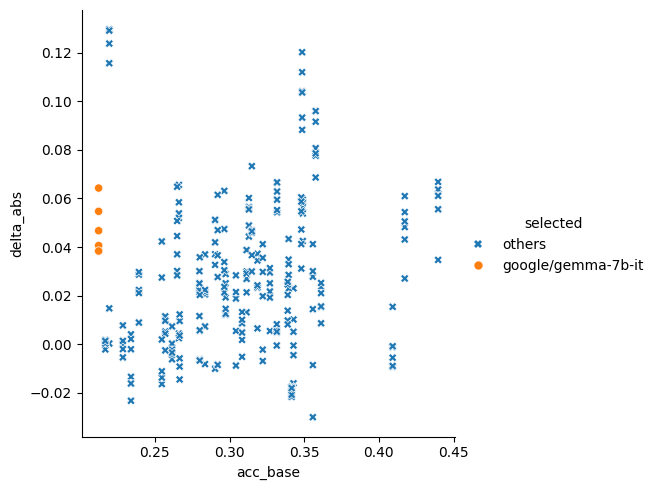

In [ ]:
display(Markdown(
  "### Average baseline accuracy (x) and marginal accuracy gain (y) of LLMs in Open CoT Leaderboard\n\n"
  "(Displaying six dots per LLM, one for each regime.)"
))
plot_avg_acc(w.value)